# 1. Common data problems

In this chapter, you'll learn how to overcome some of the most common dirty data problems. You'll convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.

## 1.1 Data type constraints

## 1.2 Common data types

Manipulating and analyzing data with incorrect data types could lead to compromised analysis as you go along the data science workflow.

When working with new data, you should always check the data types of your columns using the `.dtypes` attribute or the `.info()` method which you'll see in the next exercise. Often times, you'll run into columns that should be converted to different data types before starting any analysis.

In this exercise, you'll first identify different types of data and correctly map them to their respective types.

### 1.2.1 Instructions

- Assign each card to what type of data you think it is.
  
  | Numeric data types                        | Text                           | Dates                   |
  |:-----------------------------------------:|:------------------------------:|:-----------------------:|
  | Number of items bought in a basket        | City of residence              | Order date of a product |
  | Number of points on customer loyalty card | First name                     | Birthdates of clients   |
  | Salary earned monthly                     | Shipping address of a customer |                         |

## 1.3 Numeric data or ... ?

In this exercise, and throughout this chapter, you'll be working with bicycle ride sharing data in San Francisco called `ride_sharing`. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The `user_type` column contains information on whether a user is taking a free ride and takes on the following values:

- `1` for free riders.
- `2` for pay per ride.
- `3` for monthly subscribers.

In this instance, you will print the information of `ride_sharing` using `.info()` and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. The `pandas` package is imported as `pd`.

### 1.3.1 Instructions 1/3

- Print the information of `ride_sharing`.
- Use `.describe()` to print the summary statistics of the `user_type` column from `ride_sharing`.

```python
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())
```

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None
count    25760.000
mean         2.008
std          0.705
min          1.000
25%          2.000
50%          2.000
75%          3.000
max          3.000
Name: user_type, dtype: float64
```

### 1.3.2 Instructions 2/3

### Question

By looking at the summary statistics - they don't really seem to offer much description on how users are distributed along their purchase type, why do you think that is?

### Possible answers

- [ ] The `user_type` column is not of the correct type, it should be converted to `str`.

- [ ] The `user_type` column has an infinity set of possible values, it should be converted to `category`.

- [x] The `user_type` column has an finite set of possible values that represent groupings of data, it sholud be converted to `category`

### 1.3.3 Instructions 3/3

- Convert `user_type` into categorical by assigning it the `'category'` data type and store it in the `user_type_cat` column.
- Make sure you converted `user_type_cat` correctly by using an `assert` statement.

```python
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())
```

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None
count    25760.000
mean         2.008
std          0.705
min          1.000
25%          2.000
50%          2.000
75%          3.000
max          3.000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64
```

## 1.4 Summing strings and concatenating numbers

In the previous exercise, you were able to identify that `category` is the correct data type for `user_type` and convert it in order to extract relevant statistical summaries that shed light on the distribution of `user_type`.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column `duration` to the type `int`. Before that however, you will need to make sure to strip `"minutes"` from the column in order to make sure `pandas` reads it as numerical. The `pandas` package has been imported as `pd`.

### 1.4.1 Instructions

- Use the `.strip()` method to strip `duration` of `"minutes"` and store it in the `duration_trim` column.
- Convert `duration_trim` to `int` and store it in the `duration_time` column.
- Write an `assert` statement that checks if `duration_time`'s **d**ata **type** is now an `int`.
- Print the average ride duration.

```python
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())
```

```
         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056
```

## 1.5 Data range constraints

## 1.6 Tire size constraints

In this lesson, you're going to build on top of the work you've been doing with the `ride_sharing` DataFrame. You'll be working with the `tire_sizes` column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the `tire_sizes` column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

### 1.6.1 Instructions

- Convert the `tire_sizes` column from `category` to `'int'`.
- Use `.loc[]` to set all values of `tire_sizes` above 27 to 27.
- Reconvert back `tire_sizes` to `'category'` from `int`.
- Print the description of the `tire_sizes`.

```python
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())
```

```
count     25760
unique        2
top          27
freq      13274
Name: tire_sizes, dtype: int64
```

## 1.7 Back to the future

A new update to the data pipeline feeding into the `ride_sharing` DataFrame has been updated to register each ride's date. This information is stored in the `ride_date` column of the type `object`, which represents strings in `pandas`.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the `ride_date` column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert `ride_date` to a `datetime` object.

The `datetime` package has been imported as `dt`, alongside all the packages you've been using till now.

### 1.7.1 Instructions

- Convert `ride_date` to a `datetime` object using `to_datetime()`, then convert the `datetime` object into a `date` and store it in `ride_dt` column.
- Create the variable `today`, which stores today's date by using the `dt.date.today()` function.
- For all instances of `ride_dt` in the future, set them to today's date.
- Print the maximum date in the `ride_dt` column.

```python
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())
```

```
2023-05-31
```

## 1.8 Uniqueness constraints

## 1.9 How big is your subset?

You have the following `loans` DataFrame which contains loan and credit score data for consumers, and some metadata such as their first and last names. You want to find both complete and incomplete duplicates using `.duplicated().`

| first_name | last_name   | credit_score | has_loan |
| ---------- | ----------- | ------------ | -------- |
| Justin     | Saddlemeyer | 600          | 1        |
| Hadrien    | Lacroix     | 450          | 0        |

Choose the **correct** usage of `.duplicated()` below:

### 1.9.1 Answer the question

### Possible Answers

- [ ] `loans.duplicated()`  
    Because the default method returns both complete and incomplete duplicates.

- [ ] `loans.duplicated(subset = 'first_name')`  
    Because constraining the duplicate rows to the first name lets me find incomplete duplicates as well.

- [x] `loans.duplicated(subset = ['first_name', 'last_name'], keep = False)`  
    Because subsetting on consumer metadata and not discarding any duplicate returns all duplicated rows.

- [ ] `loans.duplicated(subset = ['first_name', 'last_name'], keep = 'first')`  Because this drops all duplicates.

## 1.10 Finding duplicates

A new update to the data pipeline feeding into `ride_sharing` has added the `ride_id` column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the `ride_sharing` DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of `ride_sharing` is in your environment, as well as all the packages you've been working with thus far.

### 1.10.1 Instructions

- Find duplicated rows of `ride_id` in the `ride_sharing` DataFrame while setting `keep` to `False`.
- Subset `ride_sharing` on `duplicates` and sort by `ride_id` and assign the results to `duplicated_rides`.
- Print the `ride_id`, `duration` and `user_birth_year` columns of `duplicated_rides` in that order.

```python
# Find duplicates
duplicates = ride_sharing.duplicated(subset = 'ride_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])
```

```
    ride_id  duration  user_birth_year
22       33        10             1979
39       33         2             1979
53       55         9             1985
65       55         9             1985
74       71        11             1997
75       71        11             1997
76       89         9             1986
77       89         9             2060
```

## 1.11 Treating duplicates

In the last exercise, you were able to verify that the new update feeding into `ride_sharing` contains a bug generating both complete and incomplete duplicated rows for some values of the `ride_id` column, with occasional discrepant values for the `user_birth_year` and `duration` columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average `duration`, and the minimum `user_birth_year` for each set of incomplete duplicate rows.

### 1.11.1 Instructions

- Drop complete duplicates in `ride_sharing` and store the results in `ride_dup`.
- Create the `statistics` dictionary which holds **min**imum aggregation for `user_birth_year` and **mean** aggregation for `duration`.
- Drop incomplete duplicates by grouping by `ride_id` and applying the aggregation in `statistics`.
- Find duplicates again and run the `assert` statement to verify de-duplication.

```python
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0
```

# 2. Text and categorical data problems

Categorical and text data can often be some of the messiest parts of a dataset due to their unstructured nature. In this chapter, you’ll learn how to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.

## 2.1 Membership constraints

## 2.2 Members only

Throughout the course so far, you've been exposed to some common problems that you may encounter with your data, from data type constraints, data range constrains, uniqueness constraints, and now membership constraints for categorical values.

In this exercise, you will map hypothetical problems to their respective categories.

### 2.2.1 Instructions

- Map the data problem observed with the correct type of data problem.

| Membership Constraint                                | Other Constraint                                    |
|:----------------------------------------------------:|:---------------------------------------------------:|
| A `GPA` column containing a `Z-` grade.              | A `birthdate` column with the values in the future. |
| A `month` column with the value `14`.                | An `age` column with values above 130.              |
| A `has_loan` column with the value `12`.             | A `revenue` column represented as a string.         |
| A `day_of_week` column with the value `Suntermonday` |                                                     |

## 2.3 Finding consistency

In this exercise and throughout this chapter, you'll be working with the `airlines` DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named `categories` was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The `pandas` package has been imported as `pd`, and the `airlines` and `categories` DataFrames are in your environment.

### 2.3.1 Instructions 1/4

- Print the `categories` DataFrame and take a close look at all possible correct categories of the survey columns.
- Print the unique values of the survey columns in `airlines` using the `.unique()` method.

```python
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")
```

```
      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean', 'Average', 'Unacceptable', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
Categories (6, object): ['Average', 'Clean', 'Dirty', 'Somewhat clean', 'Somewhat dirty', 'Unacceptable'] 

Safety:  ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
Categories (5, object): ['Neutral', 'Somewhat safe', 'Somewhat unsafe', 'Very safe', 'Very unsafe'] 

Satisfaction:  ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
Categories (5, object): ['Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very satisfied', 'Very unsatisfied'] 
```

### 2.3.2 Instructions 2/4

### Question

Take a look at the output. Out of the `cleanliness`, `safety` and `satisfaction` columns, which one has an inconsistent category and what is it?

### Possible answers

- [x] `cleanliness` because it has an `Unacceptable` category.

- [ ] `cleanliness` because it has an `Terribly Dirty` category.

- [ ] `satisfaction` because it has an `Very satisfied` category.

- [ ] `safety` because it has a `Neutral` category.

### 2.3.3 Instructions 3/4

- Create a set out of the `cleanliness` column in `airlines` using `set()` and find the inconsistent category by finding the **difference** in the `cleanliness` column of `categories`.
- Find rows of `airlines` with a `cleanliness` value not in `categories` and print the output.

```python
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])
```

```
       id        day           airline  destination  dest_region dest_size boarding_area   dept_time  wait_min   cleanliness         safety        satisfaction
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe  Somewhat satisfied
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub  Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe  Somewhat satisfied
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe  Somewhat satisfied
```

### 2.3.4 Instructions 4/4

- Print the rows with the consistent categories of `cleanliness` only.

```python
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])
```

```
       id        day           airline  destination  dest_region dest_size boarding_area   dept_time  wait_min   cleanliness         safety        satisfaction
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe  Somewhat satisfied
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub  Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe  Somewhat satisfied
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe  Somewhat satisfied
        id       day        airline        destination    dest_region dest_size boarding_area   dept_time  wait_min     cleanliness         safety        satisfaction
0     1351   Tuesday    UNITED INTL             KANSAI           Asia       Hub  Gates 91-102  2018-12-31     115.0           Clean        Neutral      Very satisfied
1      373    Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico     Small   Gates 50-59  2018-12-31     135.0           Clean      Very safe      Very satisfied
2     2820  Thursday          DELTA        LOS ANGELES        West US       Hub   Gates 40-48  2018-12-31      70.0         Average  Somewhat safe             Neutral
3     1157   Tuesday      SOUTHWEST        LOS ANGELES        West US       Hub   Gates 20-39  2018-12-31     190.0           Clean      Very safe  Somewhat satisfied
5      634  Thursday         ALASKA             NEWARK        East US       Hub   Gates 50-59  2018-12-31     140.0  Somewhat clean      Very safe      Very satisfied
...    ...       ...            ...                ...            ...       ...           ...         ...       ...             ...            ...                 ...
2804  1475   Tuesday         ALASKA       NEW YORK-JFK        East US       Hub   Gates 50-59  2018-12-31     280.0  Somewhat clean        Neutral  Somewhat satisfied
2805  2222  Thursday      SOUTHWEST            PHOENIX        West US       Hub   Gates 20-39  2018-12-31     165.0           Clean      Very safe      Very satisfied
2806  2684    Friday         UNITED            ORLANDO        East US       Hub   Gates 70-90  2018-12-31      92.0           Clean      Very safe      Very satisfied
2807  2549   Tuesday        JETBLUE         LONG BEACH        West US     Small    Gates 1-12  2018-12-31      95.0           Clean  Somewhat safe      Very satisfied
2808  2162  Saturday  CHINA EASTERN            QINGDAO           Asia     Large    Gates 1-12  2018-12-31     220.0           Clean      Very safe  Somewhat satisfied

[2474 rows x 12 columns]
```

## 2.4 Categorical variables

## 2.5 Categories of errors

In the video exercise, you saw how to address common problems affecting categorical variables in your data, including white spaces and inconsistencies in your categories, and the problem of creating new categories and mapping existing ones to new ones.

To get a better idea of the toolkit at your disposal, you will be mapping functions and methods from `pandas` and Python used to address each type of problem.

### 2.5.1 Instructions

- Map each function/method to the categorical data problem it solves.

| White spaces and inconsistancy | Creating or remapping categories |
|:------------------------------:|:--------------------------------:|
| `.str.lower()`                 | `pandas.qcut()`                  |
| `.str.strip()`                 | `pandas.cut()`                   |
| `.str.upper()`                 | `.replace()`                     |


## 2.6 Inconsistent categories

In this exercise, you'll be revisiting the `airlines` DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The `pandas` package has been imported as `pd`, and the `airlines` DataFrame is in your environment.

### 2.6.1 Instructions 1/4

- Print the unique values in `dest_region` and `dest_size` respectively.

```python
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())
```

```
['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
```

### 2.6.2 Instructions 2/4

### Question

From looking at the output, what do you think is the problem with these columns?

### Possible answers

The `dest_region` column has only inconsistent values due to capitalization.

- [ ] The `dest_region` column has only inconsistent values due to capitalization

- [ ] The `dest_region` column has only inconsistent values due to capitalization and has one value that needs to be remapped.

- [ ] The `dest_size` column has only inconsistent values due to leading and trailing spaces.

- [x] Both 2 and 3 are correct.

### 2.6.3 Instructions 3/4

- Change the capitalization of all values of `dest_region` to lowercase.
- Replace the `'eur'` with `'europe'` in `dest_region` using the `.replace()` method. 

```python
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
```


```
['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
```

### 2.6.4 Instructions 4/4

- Strip white spaces from the `dest_size` column using the `.strip()` method.
- Verify that the changes have been into effect by printing the unique values of the columns using `.unique()`

```python
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())
```

```
['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']
```

## 2.7 Remapping categories

To better understand survey respondents from `airlines`, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The `day` column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

- `wait_type`: `'short'` for 0-60 min, `'medium'` for 60-180 and `long` for 180+
- `day_week`: `'weekday'` if day is in the weekday, `'weekend'` if day is in the weekend.

The `pandas` and `numpy` packages have been imported as `pd` and `np`. Let's create some new categorical data!

### 2.7.1 Instructions

- Create the ranges and labels for the `wait_type` column mentioned in the description.
- Create the `wait_type` column by from `wait_min` by using `pd.cut()`, while inputting `label_ranges` and `label_names` in the correct arguments.
- Create the `mapping` dictionary mapping weekdays to `'weekday'` and weekend days to `'weekend'`.
- Create the `day_week` column by using `.replace()`.

```python
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
```

## 2.8 Cleaning text data

## 2.9 Removing titles and taking names

While collecting survey respondent metadata in the `airlines` DataFrame, the full name of respondents was saved in the `full_name` column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as `"Dr."`, `"Mr."`, `"Ms."` and `"Miss"`.

Your ultimate objective is to create two new columns named `first_name` and `last_name`, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The `airlines` DataFrame is in your environment, alongside `pandas` as `pd.`

### 2.9.1 Instructions

- Remove `"Dr."`, `"Mr."`, `"Miss"` and `"Ms."` from `full_name` by replacing them with an empty string `""` in that order.
- Run the `assert` statement using `.str.contains()` that tests whether `full_name` still contains any of the honorifics.

```python
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False
```

## 2.10 Keeping it descriptive

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the `survey_response` column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than ***40*** , and make sure your new DataFrame contains responses with ***40*** characters or more using an `assert` statement.

The `airlines` DataFrame is in your environment, and `pandas` is imported as `pd`.

### 2.10.1 Instructions

- Using the `airlines` DataFrame, store the length of each instance in the `survey_response` column in `resp_length` by using `.str.len()`.
- Isolate the rows of `airlines` with `resp_length` higher than `40`.
- Assert that the smallest `survey_response` length in `airlines_survey` is now bigger than `40`.

```python
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])
```

```
18    The airport personnell forgot to alert us of d...
19    The food in the airport was really really expe...
20    One of the other travelers was really loud and...
21    I don't remember answering the survey with the...
22    The airport personnel kept ignoring my request...
23    The chair I sat in was extremely uncomfortable...
24    I wish you were more like other airports, the ...
25    I was really unsatisfied with the wait times b...
27    The flight was okay, but I didn't really like ...
28    We were really slowed down by security measure...
29    There was a spill on the aisle next to the bat...
30    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object
```

# 3 Advanced data problems

In this chapter, you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.

## 3.1 Uniformity

## 3.2 Ambiguous dates

You have a DataFrame containing a `subscription_date` column that was collected from various sources with different Date formats such as `YYYY-mm-dd` and `YYYY-dd-mm`. What is the best way to unify the formats for ambiguous values such as `2019-04-07`?

### 3.2.1 Answer the question

### Possible Answers

- [ ] Set them to `NA` and drop them.

- [ ] Infer the format of the data in question by checking the format of subsequent and previous values.

- [ ] Infer the format from the original data source.

- [x] All of the above are possible, as long as we investigate where our data comes from, and understand the dynamics affecting it before cleaning it.

## 3.3 Uniform currencies

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the `banking` DataFrame. The dataset contains data on the amount of money stored in accounts (`acct_amount`), their currency (`acct_cur`), amount invested (`inv_amount`), account opening date (`account_opened`), and last transaction date (`last_transaction`) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The `pandas` package has been imported as `pd`, and the `banking` DataFrame is in your environment.

### 3.3.1 Instructions

- Find the rows of `acct_cur` in `banking` that are equal to `'euro'` and store them in the variable `acct_eu`.
- Find all the rows of `acct_amount` in `banking` that fit the `acct_eu` condition, and convert them to USD by multiplying them with `1.1`.
- Find all the rows of `acct_cur` in `banking` that fit the `acct_eu` condition, set them to `'dollar'`.

```python
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'
```

## 3.4 Uniform dates

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The `account_opened` column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a `datetime` object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The `banking` DataFrame is in your environment and `pandas` was imported as `pd`.

### 3.4.1 Instructions 1/4

- Print the header of `account_opened` from the `banking` DataFrame and take a look at the different results.

```python
# Print the header of account_opened
print(banking['account_opened'].head())
```

```
0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object
```

### 3.4.2 Instructions 2/4

### Question

Take a look at the output. You tried converting the values to `datetime` using the default `to_datetime()` function without changing any argument, however received the following error:

```
ValueError: month must be in 1..12
```

Why do you think that is?

### Possible answers

- [ ] The `to_datetime()` function needs to be explicity told which date format each row is in.

- [ ] The `to_datetime()` function can only be applied on `YY-mm-dd` date formats.

- [x] The `21-14-17` entry is erroneous and leads to an error.

### 3.4.3 Instructions 3/4

- Convert the `account_opened` column to `datetime`, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.

```python
# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 
```

```
0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object
```

### 3.4.4 Instructions 4/4

- Extract the year from the amended `account_opened` column and assign it to the `acct_year` column.
- Print the newly created `acct_year` column.

```python
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])
```

```
0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object
0     2018
1     2018
2     2018
3      NaN
4     2017
      ... 
92    2017
93    2018
94    2018
95    2017
96    2017
Name: acct_year, Length: 97, dtype: object
```

## 3.5 Cross field validation

## 3.6 Cross field or no cross field?

Throughout this course, you've been immersed in a variety of data cleaning problems from range constraints, data type constraints, uniformity and more.

In this lesson, you were introduced to cross field validation as a means to sanity check your data and making sure you have strong data integrity.

Now, you will map different applicable concepts and techniques to their respective categories.

### 3.6.1 Instructions

- Map different applicable concepts and techniques to their respective categories.

| Cross field validation                                                  | Not cross field validation                                                |
|:-----------------------------------------------------------------------:|:-------------------------------------------------------------------------:|
| Confirming the Age provided by users by cross checking their birthdays. | Making sure a `subscription_date` column has no values set in the future. |
| Row wise operations such as `.sum(axis = 1)`                            | The use of the `.astype()` method.                                        |
|                                                                         | Making sure that a `revenue` column is a numeric column.                  |

## 3.7 How's our data integrity?

New data has been merged into the `banking` DataFrame that contains details on how investments in the `inv_amount` column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the `age` and `birth_date` columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of `inv_amount` and `age` against the amount invested in different funds and customers' birthdays. Both `pandas` and `datetime` have been imported as `pd` and `dt` respectively.

### 3.7.1 Instructions 1/2

- Find the rows where the sum of all rows of the `fund_columns` in `banking` are equal to the `inv_amount` column.
- Store the values of `banking` with consistent `inv_amount` in `consistent_inv`, and those with inconsistent ones in `inconsistent_inv`.

```python
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])
```

```
Number of inconsistent investments:  8
```

### 3.7.2 Instructions 2/2

- Store today's date into `today`, and manually calculate customers' ages and store them in `ages_manual`.

- Find all rows of `banking` where the `age` column is equal to `ages_manual` and then filter `banking` into `consistent_ages` and `inconsistent_ages`.

```python
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
```

```
Number of inconsistent ages:  4
```

## 3.8 Completeness

## 3.9 Is this missing at random?

You've seen in the video exercise how there are a variety of missingness types when observing missing data. As a reminder, missingness types can be described as the following:

- **Missing Completely at Random:** No systematic relationship between a column's missing values and other or own values.*
- **Missing at Random:** There is a systematic relationship between a column's missing values and other **observed** values.*
- **Missing not at Random:** There is a systematic relationship between a column's missing values and **unobserved** values.*

You have a DataFrame containing customer satisfaction scores for a service. What type of missingness is the following?  

 *A customer* `satisfaction_score` *column with missing values for highly dissatisfied customers.*

### 3.9.1 Answer the question

### Possible Answers

- [ ] Missing completely at random.

- [ ] Missing at random.

- [x] Missing not at random.

## 3.10 Missing investors

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the `banking` DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing `inv_amount` values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The `pandas`, `missingno` and `matplotlib.pyplot` packages have been imported as `pd`, `msno` and `plt` respectively. The `banking` DataFrame is in your environment.

### 3.10.1 Instructions 1/4

- Print the number of missing values by column in the `banking` DataFrame.
- Plot and show the missingness matrix of `banking` with the `msno.matrix()` function.

```python
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()
```

```
cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64
```

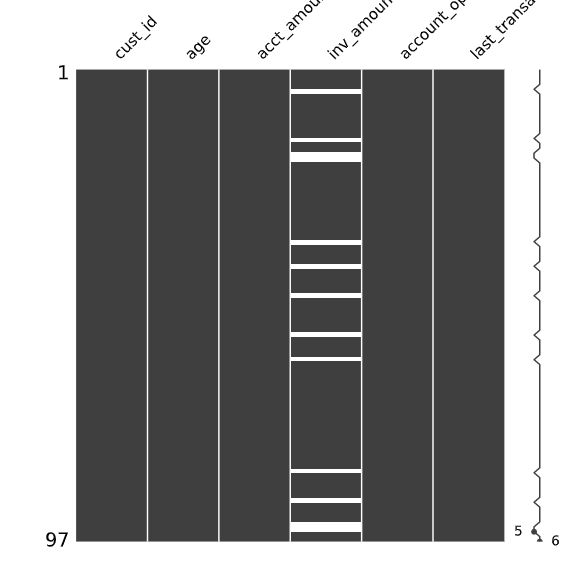

### 3.10.2 Instructions 2/4

- Isolate the values of `banking` missing values of `inv_amount` into `missing_investors` and with non-missing `inv_amount` values into `investors`.

```python
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]
```

### 3.10.3 Instructions 3/4

### Question

Now that you've isolated `banking` into `investors` and `missing_investors`, use the `.describe()` method on both of these DataFrames in the IPython shell to understand whether there are structural differences between them. What do you think is going on?

### Possible answers

- [ ] The data is missing completely at random and there are no drivers behind the missingness.

- [x] The `inv_amount` is missing only for young customers, since the average age in `missing_investors` is 22 and the maximum age is 25.

- [ ] The `inv_amount` is missing only for old customers, since the average age in `missing_investors` is 42 and the maximum age is 59

### 3.10.4 Instructions 4/4

- Sort the `banking` DataFrame by the `age` column and plot the missingness matrix of `banking_sorted`.

```python
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(['age'])
msno.matrix(banking_sorted)
plt.show()
```

```
cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64
```

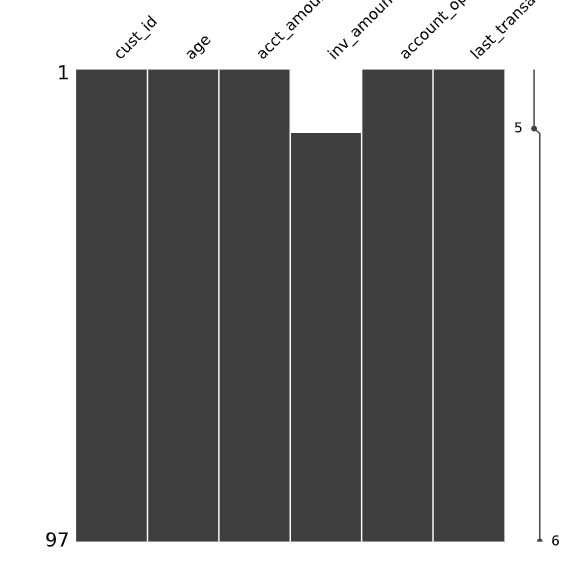

## 3.11 Follow the money

In this exercise, you're working with another version of the `banking` DataFrame that contains missing values for both the `cust_id` column and the `acct_amount` column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing `cust_id` don't really help you, and that on average `acct_amount` is usually 5 times the amount of `inv_amount`.

In this exercise, you will drop rows of `banking` with missing `cust_id`s, and impute missing values of `acct_amount` with some domain knowledge.

### 3.11.1 Instructions

- Use `.dropna()` to drop missing values of the `cust_id` column in `banking` and store the results in `banking_fullid`.
- Use `inv_amount` to compute the estimated account amounts for `banking_fullid` by setting the amounts equal to `inv_amount * 5`, and assign the results to `acct_imp`.
- Impute the missing values of `acct_amount` in `banking_fullid` with the newly created `acct_imp` using `.fillna()`.

```python
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())
```

```
cust_id             0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64
```

# 4 Record linkage

Record linkage is a powerful technique used to merge multiple datasets together, used when values have typos or different spellings. In this chapter, you'll learn how to link records by calculating the similarity between strings—you’ll then use your new skills to join two restaurant review datasets into one clean master dataset.

## 4.1 Comparing strings

## 4.2 Minimum edit distance

In the video exercise, you saw how minimum edit distance is used to identify how similar two strings are. As a reminder, minimum edit distance is the minimum number of steps needed to reach from ***String A*** to ***String B***, with the operations available being:

- **Insertion** of a new character.
- **Deletion** of an existing character.
- **Substitution** of an existing character.
- **Transposition** of two existing consecutive characters.

*What is the minimum edit distance from* `'sign'` *to* `'sing'`, *and which operation(s) gets you there?*

### 4.2.1 Answer the question

### Possible Answers

- [ ] 2 by substituting `'g'` with `'n'` and `'n'` with `'g'`.

- [x] 1 by transposing `'g'` with `'n'`.

- [ ] 1 by substituting `'g'` with `'n'`.

- [ ] 2 by deleting `'g'` and inserting a new `'g'` at the end.

## 4.3 The cutoff point

In this exercise, and throughout this chapter, you'll be working with the `restaurants` DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of `restaurants` has been collected from many sources, where the `cuisine_type` column is riddled with typos, and should contain only `italian`, `american` and `asian` cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the `thefuzz`'s `process.extract()` function by finding the similarity score of the most *distant* typo of each category.

### 4.3.1 Instructions 1/2

- Import `process` from `thefuzz`.
- Store the unique `cuisine_type`s into `unique_types`.
- Calculate the similarity of `'asian'`, `'american'`, and `'italian'` to all possible `cuisine_type`s using `process.extract()`, while returning all possible matches.

```python
# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))
```

```
[('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italian', 67), ('amurican', 62), ('american', 62), ('italiaan', 62), ('italiian', 62), ('itallian', 62), ('americann', 57), ('americano', 57), ('ameerican', 57), ('aamerican', 57), ('ameriican', 57), ('amerrican', 57), ('ammericann', 54), ('ameerrican', 54), ('ammereican', 54), ('america', 50), ('merican', 50), ('murican', 50), ('italien', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)]
[('american', 100), ('americann', 94), ('americano', 94), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('amurican', 88), ('americen', 88), ('americin', 88), ('amerycan', 88), ('murican', 80), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asiaan', 57), ('italian', 53), ('asianne', 53), ('italiann', 50), ('italiano', 50), ('italiaan', 50), ('italiian', 50), ('itallian', 50), ('italianne', 47), ('asiat', 46), ('itali', 40), ('italien', 40)]
[('italian', 100), ('italiann', 93), ('italiano', 93), ('italiaan', 93), ('italiian', 93), ('itallian', 93), ('italianne', 88), ('italien', 86), ('itali', 83), ('asian', 67), ('asiane', 62), ('asiann', 62), ('asiian', 62), ('asiaan', 62), ('asianne', 57), ('amurican', 53), ('american', 53), ('americann', 50), ('asiat', 50), ('americano', 50), ('ameerican', 50), ('aamerican', 50), ('ameriican', 50), ('amerrican', 50), ('ammericann', 47), ('ameerrican', 47), ('ammereican', 47), ('america', 43), ('merican', 43), ('murican', 43), ('americen', 40), ('americin', 40), ('amerycan', 40)]
```

### 4.3.2 Instructions 2/2

### Question

Take a look at the output, what do you think should be the similarity cutoff point when remapping categories?

### Possible answers

- [x] 80

- [ ] 70

- [ ] 60

## 4.4 Remapping categories II

In the last exercise, you determined that the distance cutoff point for remapping typos of `'american'`, `'asian'`, and `'italian'` cuisine types stored in the `cuisine_type` column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using `fuzywuzzy.process`'s `extract()` function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using `process.extract()`, the output is a list of tuples where each is formatted like:

```python
(closest match, similarity score, index of match)
```

The `restaurants` DataFrame is in your environment, and you have access to a `categories` list containing the correct cuisine types (`'italian'`, `'asian'`, and `'american'`).

### 4.4.1 Instructions 1/4

- Return all of the unique values in the `cuisine_type` column of `restaurants`.

```python
# Inspect the unique values of the cuisine_type column
print(restaurants['cuisine_type'].unique())
```

```
['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'itali'
 'asiann' 'murican' 'italien' 'italian' 'asiat' 'american' 'americano'
 'italiann' 'ameerican' 'asianne' 'italiano' 'americin' 'ammericann'
 'amerycan' 'aamerican' 'ameriican' 'italiaan' 'asiian' 'asiaan'
 'amerrican' 'ameerrican' 'ammereican' 'asian' 'italianne' 'italiian'
 'itallian']
```

### 4.4.2 Instructions 2/4

Okay! Looks like you will need to use some string matching to correct these misspellings!

- As a first step, create a list of all possible `matches`, comparing `'italian'` with the restaurant types listed in the `cuisine_type` column.

```python
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = matches = process.extract('italian', restaurants['cuisine_type'], limit = len(restaurants))

# Inspect the first 5 matches
print(matches[0:5])
```

```
[('italian', 100, 11), ('italian', 100, 25), ('italian', 100, 41), ('italian', 100, 47), ('italian', 100, 49)]
```

### 4.4.3 Instructions 3/4

Now you're getting somewhere! Now you can iterate through `matches` to reassign similar entries.

- Within the `for` loop, use an `if` statement to check whether the similarity score in each `match` is greater than or equal to 80.
- If it is, use `.loc` to select rows where `cuisine_type` in `restaurants` is *equal* to the current match (which is the first element of `match`), and reassign them to be `'italian'`.


```python
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['cuisine_type'] == match[0], 'cuisine_type'] = 'italian'
```

### 4.4.4 Instructions 4/4

Finally, you'll adapt your code to work with every restaurant type in `categories`.

- Using the variable `cuisine` to iterate through `categories`, embed your code from the previous step in an outer `for` loop.
- Inspect the final result. *This has been done for you.*

```python
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine

# Inspect the final result
print(restaurants['cuisine_type'].unique())
```

```
['american' 'asian' 'italian']
```

## 4.5 Generating pairs

## 4.6 To link or not to link?

Similar to joins, record linkage is the act of linking data from different sources regarding the same entity. But unlike joins, record linkage does not require exact matches between different pairs of data, and instead can find close matches using string similarity. This is why record linkage is effective when there are no common unique keys between the data sources you can rely upon when linking data sources such as a unique identifier.

In this exercise, you will classify each card whether it is a traditional join problem, or a record linkage one.

### 4.6.1 Instructions

- Classify each card into a problem that requires record linkage or regular joins.

| Record linkage                                                                                                                              | Regular joins                                                                                                                    |
|:-------------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------:|
| Merging two basketball DataFrames, with columns `team_A`, `team_B`, and `time` and differently formatted team names between each DataFrame. | Two basketball DataFrames with a common unique identifier per game.                                                              |
| Using an `address` column to join two DataFrames, with the address in each DataFrame being formatted slightly differntly.                   | Consolidating two DataFrames containing details on DataCamp courses, with each DataCamp course having its own unique identifier. |
| Two customer Dataframes containing names and address, one with a unique identifier per customer, one without.                               |                                                                                                                                  |

## 4.7 Pairs of restaurants

In the last lesson, you cleaned the `restaurants` dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named `restaurants_new` with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the `cuisine_type` and `city` columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with `restaurants`.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between `restaurants` and `restaurants_new`. Both DataFrames, `pandas` and `recordlinkage` are in your environment.

### 4.7.1 Instructions 1/2

- Instantiate an indexing object by using the `Index()` function from `recordlinkage`.
- Block your pairing on `cuisine_type` by using `indexer`'s' `.block()` method.
- Generate pairs by indexing `restaurants` and `restaurants_new` in that order.

```python
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)
```

### 4.7.2 Instructions 2/2

### Question

Now that you've generated your pairs, you've achieved the first step of record linkage. What are the steps remaining to link both restaurants DataFrames, and in what order?

### Possible answers

- [x] Compare between columns, score the comparism, then link the DataFrames.

- [ ] Clean the data, Compare between columns, link the DataFrames, then score the comparism

- [ ] Clean the data, Compare between columns, score the comparism, then link the DataFrames.

## 4.8 Similar restaurants

In the last exercise, you generated pairs between `restaurants` and `restaurants_new` in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in `pairs`, you will find exact matches in the `city` and `cuisine_type` columns between each pair, and similar strings for each pair in the `rest_name` column. Both DataFrames, `pandas` and `recordlinkage` are in your environment.

### 4.8.1 Instructions 1/4

- Instantiate a comparison object using the `recordlinkage.Compare()` function.

```python
# Create a comparison object
comp_cl = recordlinkage.Compare()
```

### 4.8.2 Instructions 2/4

- Use the appropriate `comp_cl` method to find exact matches between the `city` and `cuisine_type` columns of both DataFrames.
- Use the appropriate `comp_cl` method to find similar strings with a `0.8` similarity threshold in the `rest_name` column of both DataFrames.

```python
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label = 'cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold=0.8) 
```

```
<Compare>
```

### 4.8.3 Instructions 3/4

- Compute the comparison of the pairs by using the `.compute()` method of `comp_cl`.

```python
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)
```

```
        city  cuisine_type  name
0   0      0             1   0.0
    1      0             1   0.0
    7      0             1   0.0
    12     0             1   0.0
    13     0             1   0.0
...      ...           ...   ...
40  18     0             1   0.0
281 18     0             1   0.0
288 18     0             1   0.0
302 18     0             1   0.0
308 18     0             1   0.0

[3631 rows x 3 columns]
```

## 4.8.4 Instructions 4/4

### Question

Print out `potential_matches`, the columns are the columns being compared, with values being 1 for a match, and 0 for not a match for each pair of rows in your DataFrames. To find potential matches, you need to find rows with more than matching value in a column. You can find them with

```python
potential_matches[potential_matches.sum(axis = 1) >= n]
```

Where `n` is the minimum number of columns you want matching to ensure a proper duplicate find, what do you think should the value of `n` be?

- [x] 3 because I need to have matches in all my columns

- [ ] 2 because matching on any of the 2 columns or more is enough to find potential duplicates.

- [ ] 1 because matching on just 1 column like the restaurant name is enough to find potential duplicates.

## 4.9 Linking DataFrames

## 4.10 Getting the right index

Here's a DataFrame named `matches` containing potential matches between two DataFrames, `users_1` and `users_2`. Each DataFrame's row indices is stored in `uid_1` and `uid_2` respectively.

```
             first_name  address_1  address_2  marriage_status  date_of_birth
uid_1 uid_2                                                                  
0     3              1          1          1                1              0
     ...            ...         ...        ...              ...            ...
     ...            ...         ...        ...              ...            ...
1     3              1          1          1                1              0
     ...            ...         ...        ...              ...            ...
     ...            ...         ...        ...              ...            ...
```

How do you extract all values of the `uid_1` index column?

### 4.10.1 Answer the question

### Possible Answers

- [ ] `matches.index.get_level_values(0)`

- [ ] `matches.index.get_level_values(1)`

- [ ] `matches.index.get_level_values('uid_1')`

- [x] Both 1 and 3 are correct.

## 4.11 Linking them together!

In the last lesson, you've finished the bulk of the work on your effort to link `restaurants` and `restaurants_new`. You've generated the different pairs of potentially matching rows, searched for exact matches between the `cuisine_type` and `city` columns, but compared for similar strings in the `rest_name` column. You stored the DataFrame containing the scores in `potential_matches`.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of `restaurants_new` that are matching across the columns mentioned above from `potential_matches`. Then you will subset `restaurants_new` on these indices, then append the non-duplicate values to `restaurants`. All DataFrames are in your environment, alongside `pandas` imported as `pd`.

### 4.11.1 Instructions

- Isolate instances of `potential_matches` where the row sum is above or equal to 3 by using the `.sum()` method.
- Extract the second column index from `matches`, which represents row indices of matching record from `restaurants_new` by using the `.get_level_values()` method.
- Subset `restaurants_new` for rows that are not in `matching_indices`.
- Append `non_dup` to `restaurants`.

```python
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)
```

```

                    rest_name                  rest_addr               city       phone cuisine_type
0   arnie morton's of chicago   435 s. la cienega blv .         los angeles  3102461501     american
1          art's delicatessen       12224 ventura blvd.         studio city  8187621221     american
2                   campanile       624 s. la brea ave.         los angeles  2139381447     american
3                       fenix    8358 sunset blvd. west           hollywood  2138486677     american
4          grill on the alley           9560 dayton way         los angeles  3102760615     american
..                        ...                        ...                ...         ...          ...
76                        don        1136 westwood blvd.           westwood  3102091422      italian
77                      feast        1949 westwood blvd.            west la  3104750400      chinese
78                   mulberry        17040 ventura blvd.             encino  8189068881        pizza
80                    jiraffe      502 santa monica blvd       santa monica  3109176671  californian
81                   martha's  22nd street grill 25 22nd  st. hermosa beach  3103767786     american

[396 rows x 5 columns]
```

## 4.12 Congratulations!